# Deep Learning - Report 1
This is a template notebook of your report. Please complete your report with your team mate following these instructions:
- Work on the exercies below by filling the notebook.
- **Rename your notebook** in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report1.ipynb`. For example, when the team consists of Johann FAOUZI and Ikko Yamane, the file name should look like `JohannFAOUZI_IkkoYAMANE_report1.ipynb`.
- You are only allowed to edit new cells you have added (except the "Solution to Exercise 0" cell).
- Write `### Solution to Exercise (number)` at the beginning of each cell you add.
- Please submit your notebook on Moodle.
- The submission deadline is 17:00 (UTC+2) of September 19, 2023.
- Explain your code with comment or/and markdown. The explanations will be taken into account for the evaluation.

## Exercise 0
- Rename your notebook in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report1.ipynb`.
- Write your names and email addresses.

### Solution to Exercise 0
- Name of Author 1: Lorenzo Mathieu
- Name of Author 2: Elwenn Joubrel
- Email address of Author 1: id2031@ensai.fr
- Email address of Author 2:

## CIFAR-10
We are going to work on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) [Krizhevsky 2009].

For the purpose of testing your skills, we are going to directly download an original dataset and manually adapt it to the PyTorch format. The following three cells download the data, create NumPy arrays of them, and show examples. The `load_cifar10` function converts the color images to gray-scale ones when `color=False`.

[Krizhevsky 2009] [Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

In [4]:
import pickle
import numpy as np
import urllib.request
import tarfile
import os.path
from pathlib import Path

def download_cifar10():
    filename = 'cifar-10.tar.gz'
    if os.path.isfile(filename):
        print(f'{filename} already exists. Skipping downloading.')
        return

    url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

    with urllib.request.urlopen(url) as testfile, open('cifar-10.tar.gz', 'wb') as f:
        f.write(testfile.read())


def extract_cifar10(filename="cifar-10.tar.gz"):
    dirname = 'cifar-10-batches-py'
    if Path(dirname).is_dir():
        print(f'{dirname} already exists. Skipping extracting.')
        return

    tar = tarfile.open(filename)
    tar.extractall()
    tar.close()


def load_cifar10(train, dir='cifar-10-batches-py', color=False):
    data_raw = []
    if train:
        for i in range(5):
            with open(f'{dir}/data_batch_{i+1}', 'rb') as f:
                data_raw.append(pickle.load(f, encoding='bytes'))
        x = np.concatenate(
            [d[b'data'] for d in data_raw],
            axis=0)
        y = np.concatenate(
            [d[b'labels'] for d in data_raw],
            axis=0)
    else:
        with open(f'{dir}/test_batch', 'rb') as f:
            data_raw = pickle.load(f, encoding='bytes')
        x = np.array(data_raw[b'data'])
        y = np.array(data_raw[b'labels'])

    x = np.reshape(x, newshape=(len(x), 3, 32, 32))
    if not color:
        x = x.mean(axis=1, keepdims=True)  # Convert Red-Green-Blue (RGB) images to gray-scale.
    return x, y

In [5]:
download_cifar10()
extract_cifar10()
x_train_val_np, y_train_val_np = load_cifar10(train=True)
x_test_np, y_test_np = load_cifar10(train=False)

cifar-10.tar.gz already exists. Skipping downloading.
cifar-10-batches-py already exists. Skipping extracting.


['truck', 'truck', 'deer', 'automobile', 'automobile']


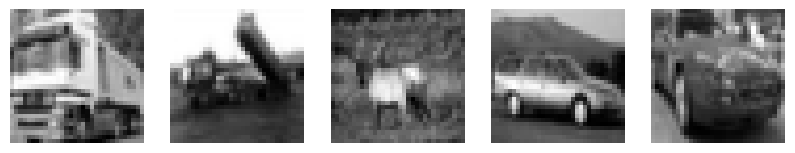

In [6]:
import matplotlib.pyplot as plt

id2class = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

def plot_images(x, y, rows=1, cols=5, color=False):
    figure = plt.figure(figsize=(2 * cols, 2 * rows))
    ys = []
    for i in range(rows):
        for j in range(cols):
            k = (i * cols) + j + 1
            figure.add_subplot(rows, cols, k)
            plt.axis("off")
            if color:
                plt.imshow(np.transpose(x[k], [1, 2, 0]))
            else:
                plt.imshow(np.transpose(x[k], [1, 2, 0]), cmap="gray")
            ys.append(y[k])
    print([id2class[id] for id in ys])
    plt.show()

plot_images(x_train_val_np, y_train_val_np, rows=1, cols=5)

## Exercise 1
Randomly split the dataset `(x_train_val_np, y_train_val_np)` to a training set `(x_train_np, y_train_np)` and a validation set `(x_val_np, y_val_np)`. Here, take `40000` data points for the training set and put the rest in the validation set.

In [7]:
from sklearn.model_selection import train_test_split

x_train_np, x_val_np, y_train_np, y_val_np = train_test_split(
    x_train_val_np, y_train_val_np, train_size=40000, random_state=42
)

## Exercise 2
Write code to convert `x_train_np, y_train_np, x_val_np, y_val_np, x_test_np, y_test_np` to PyTorch Tensors.
Name the tensors as `x_train, y_train, x_val, y_val, x_test, y_test`, respectively.

**Note**: You may need to explicitly change the `dtype` of your tensors. PyTorch by default requires the type (`dtype`) of input tensor to be `torch.float32` and that of the labels to be `torch.int64`.

In [8]:
import torch

x_train = torch.from_numpy(x_train_np).float()
x_val = torch.from_numpy(x_val_np).float()
x_test = torch.from_numpy(x_test_np).float()

y_train = torch.from_numpy(y_train_np).long()
y_val = torch.from_numpy(y_val_np).long()
y_test = torch.from_numpy(y_test_np).long()

## Exercise 3
Write a Python class `CustomDataset` deriving `torch.utils.data.Dataset` and create dataloaders for the training, validation, and test sets.

**Bonus** If possible, making the `transform` parameter and pass `ToTensor()` to it to avoid manually converting data to PyTorch tensors as in Exercise 2.

In [51]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample = {'x': self.x[idx], 'y': self.y[idx]}

        if self.transform:
            sample['x'] = self.transform(sample['x'])

        return sample['x'], sample['y']


#Values taken from "Sample-Efficient Neural Architecture Search by Learning Action Space for Monte Carlo Tree Search"
CIFAR_MEAN = [0.49139968, 0.48215827, 0.44653124]
CIFAR_STD = [0.24703233, 0.24348505, 0.26158768]
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    #transforms.ToTensor(),
    transforms.Normalize(CIFAR_MEAN, CIFAR_STD),
  ])

train_dataset = CustomDataset(x=x_train, y=y_train, transform=transform)
val_dataset = CustomDataset(x=x_val, y=y_val, transform=transform)
test_dataset = CustomDataset(x=x_test, y=y_test, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

## Exercise 4
Let the variable `device` be `'cuda'` if CUDA (GPU) is available. Otherwise, let it be `'cpu'`.
(Do **not** move the tensors from Exercise 1 to this `device` yet.)

In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Exercise 5
Write a Python class `MLP5` for Multi-Layer Perceptron (MLP) with 5 layers derivng from `nn.Module` or `nn.Sequencial`.
Your network must have the following sequential architecture:
- First hidden layer: Linear layer (64 output features) + ReLU activation function
- Second hidden layer: Linear layer (64 output features) + ReLU activation function
- Third hidden layer: Linear layer (64 output features) + ReLU activation function
- Forth hidden layer: Linear layer (64 output features) + ReLU activation function
- Final layer: Linear layer

Note that the final layer should have the output dimensionality equal to the number of classes in order to express class posterior probabilities.

In [89]:
import torch.nn as nn

class MLP5(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP5, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)

## Exercise 6
- Write a Python function for training a model with mini-batch updates for one epoch. Do not forget to move your mini-batch data to `device`.
- Also, write Python function for evaluating the loss and the accuracy of a given model with a given dataloader.

In [53]:
from torch.optim.lr_scheduler import StepLR

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    """
    Trains the model for one epoch.
    
    Args:
    - model : torch.nn.Module 
        The neural network model
    - dataloader : torch.utils.data.DataLoader
        DataLoader for the training data
    - criterion : torch.nn.Module)
        Loss function
    - optimizer : torch.optim.Optimizer 
        Optimizer algorithm
    - device : str 
        Computing device ('cuda' or 'cpu')
    
    Returns:
    - float: Average training loss for the epoch
    """
    
    model.train()
    total_loss = 0.0
    total_predictions = 0
    correct_predictions = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        
        predicted = torch.argmax(outputs, dim=1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = total_loss / len(dataloader.dataset)
    epoch_accuracy = correct_predictions / total_predictions
    scheduler.step()

    return epoch_loss, epoch_accuracy

def evaluate(model, dataloader, criterion, device):
    """
    Trains the model for one epoch.
    
    Args:
    - model : torch.nn.Module 
        The neural network model
    - dataloader : torch.utils.data.DataLoader
        DataLoader for the training data
    - criterion : torch.nn.Module)
        Loss function
    - optimizer : torch.optim.Optimizer 
        Optimizer algorithm
    - device : str 
        Computing device ('cuda' or 'cpu')

    Returns:
    - float: Average loss over the evaluation dataset
    - float: Accuracy of the model on the evaluation dataset
    """
    model.eval()  
    total_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():  
        for inputs, labels in dataloader:
            
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)

            correct_predictions += (predicted == labels).sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)

    return avg_loss, accuracy

## Exercise 7
- Create an object using your class and keep it in the `modelMLP5` variable. Do not forget move your model to `device`.
- Choose any loss function.
- Create an optimizer for optimizing `modelMLP5`.
- Train `modelMLP5` with your function(s) for 10 epochs. During the training, print the training and validation loss/accuracy every epoch.

You may need to tune hyper-parameters such as the learning rate later while observing the behavior of the model during the training.

In [98]:
from torch.optim.lr_scheduler import StepLR

modelMLP5 = MLP5(input_dim=32*32, output_dim=10)
modelMLP5.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelMLP5.parameters(), lr=0.001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)


num_epochs = 50

for epoch in range(num_epochs):

    train_loss, train_accuracy = train_one_epoch(modelMLP5, train_loader, criterion, optimizer, device)
    
    val_loss, val_accuracy = evaluate(modelMLP5, val_loader, criterion, device)
    

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 50)

Epoch 1/50
Train Loss: 2.1704, Train Accuracy: 0.2025
Validation Loss: 2.0682, Validation Accuracy: 0.2375
--------------------------------------------------
Epoch 2/50
Train Loss: 2.0005, Train Accuracy: 0.2738
Validation Loss: 1.9607, Validation Accuracy: 0.2862
--------------------------------------------------
Epoch 3/50
Train Loss: 1.9293, Train Accuracy: 0.3019
Validation Loss: 1.9323, Validation Accuracy: 0.3070
--------------------------------------------------
Epoch 4/50
Train Loss: 1.8956, Train Accuracy: 0.3195
Validation Loss: 1.9185, Validation Accuracy: 0.3071
--------------------------------------------------
Epoch 5/50
Train Loss: 1.8710, Train Accuracy: 0.3265
Validation Loss: 1.8703, Validation Accuracy: 0.3270
--------------------------------------------------
Epoch 6/50
Train Loss: 1.8501, Train Accuracy: 0.3383
Validation Loss: 1.8716, Validation Accuracy: 0.3284
--------------------------------------------------
Epoch 7/50
Train Loss: 1.8379, Train Accuracy: 0.338

In [99]:
test_loss, test_accuracy = evaluate(modelMLP5, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.6997, Test Accuracy: 0.4032


## Exercise 8
Write a Python class `MLP5BN` similarly to `MLP5`, but put a batch normalization layer (`torch.nn.BatchNorm1d`) before every activation layer.
Then, create an object using your class and keep it in the `modelMLP5BN` variable. Train this model and compare the results for `modelMLP5` and `modelMLP5BN`.

In [100]:
class MLP5BN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.3):
        super(MLP5BN, self).__init__()
        
        # Première couche cachée
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(dropout_prob)

        # Deuxième couche cachée
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(dropout_prob)

        # Troisième couche cachée
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(dropout_prob)

        # Quatrième couche cachée
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.act4 = nn.ReLU()
        self.drop4 = nn.Dropout(dropout_prob)

        # Cinquième couche cachée
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        self.bn5 = nn.BatchNorm1d(hidden_dim)
        self.act5 = nn.ReLU()
        self.drop5 = nn.Dropout(dropout_prob)

        # Couche de sortie
        self.fc6 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Flatten the input images from shape (batch_size, 3, 32, 32) to (batch_size, 3*32*32)
        x = x.view(x.size(0), -1)

        x = self.drop1(self.act1(self.bn1(self.fc1(x))))
        x = self.drop2(self.act2(self.bn2(self.fc2(x))))
        x = self.drop3(self.act3(self.bn3(self.fc3(x))))
        x = self.drop4(self.act4(self.bn4(self.fc4(x))))
        x = self.drop5(self.act5(self.bn5(self.fc5(x))))
        x = self.fc6(x)
        return x


input_dim = 32 * 32 
hidden_dim = 1024
output_dim = 10  
num_epochs = 50

modelMLP5BN = MLP5BN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelMLP5BN.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(num_epochs):

    train_loss, train_accuracy = train_one_epoch(modelMLP5BN, train_loader, criterion, optimizer, device)
    
    val_loss, val_accuracy = evaluate(modelMLP5BN, val_loader, criterion, device)
    

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 50)

Epoch 1/50
Train Loss: 1.9300, Train Accuracy: 0.3098
Validation Loss: 1.9271, Validation Accuracy: 0.3051
--------------------------------------------------
Epoch 2/50
Train Loss: 1.7585, Train Accuracy: 0.3694
Validation Loss: 1.8309, Validation Accuracy: 0.3491
--------------------------------------------------
Epoch 3/50
Train Loss: 1.6718, Train Accuracy: 0.4032
Validation Loss: 1.7339, Validation Accuracy: 0.3797
--------------------------------------------------
Epoch 4/50
Train Loss: 1.6130, Train Accuracy: 0.4220
Validation Loss: 1.7824, Validation Accuracy: 0.3710
--------------------------------------------------
Epoch 5/50
Train Loss: 1.5618, Train Accuracy: 0.4437
Validation Loss: 1.7426, Validation Accuracy: 0.3822
--------------------------------------------------
Epoch 6/50
Train Loss: 1.5186, Train Accuracy: 0.4590
Validation Loss: 1.7266, Validation Accuracy: 0.3855
--------------------------------------------------
Epoch 7/50
Train Loss: 1.4772, Train Accuracy: 0.474

In [101]:
test_loss, test_accuracy = evaluate(modelMLP5BN, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.6883, Test Accuracy: 0.5105


## Exercise 9
The following Python class `LeNet5` is an implementation of a Convolutional Neural Network (CNN).
Train this model and compare it with the previous two models. (Ignore the `num_channels` parameter of the class for now. Set it to the default value `1`.)

In [112]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10, dropout_prob=0.1):
        super(LeNet5, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(dropout_prob))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(dropout_prob))
        
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)
        
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        return out

In [113]:
input_dim = 32 * 32 
hidden_dim = 1024
output_dim = 10  

model = LeNet5(output_dim).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)
for epoch in range(num_epochs):

    train_loss, train_accuracy = train_one_epoch(model, train_loader, criterion, optimizer, device)
    
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 50)

Epoch 1/50
Train Loss: 1.7958, Train Accuracy: 0.3416
Validation Loss: 1.5485, Validation Accuracy: 0.4367
--------------------------------------------------
Epoch 2/50
Train Loss: 1.5489, Train Accuracy: 0.4388
Validation Loss: 1.5497, Validation Accuracy: 0.4460
--------------------------------------------------
Epoch 3/50
Train Loss: 1.4422, Train Accuracy: 0.4798
Validation Loss: 1.4864, Validation Accuracy: 0.4670
--------------------------------------------------
Epoch 4/50
Train Loss: 1.3750, Train Accuracy: 0.5069
Validation Loss: 1.2979, Validation Accuracy: 0.5411
--------------------------------------------------
Epoch 5/50
Train Loss: 1.3231, Train Accuracy: 0.5275
Validation Loss: 1.4504, Validation Accuracy: 0.4985
--------------------------------------------------
Epoch 6/50
Train Loss: 1.2849, Train Accuracy: 0.5414
Validation Loss: 1.2652, Validation Accuracy: 0.5442
--------------------------------------------------
Epoch 7/50
Train Loss: 1.2437, Train Accuracy: 0.557

In [114]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.0014, Test Accuracy: 0.6589


## Exercise 10
Below is the same dataset but with colors. For expressing the intensities for the red, green, blue colors, each image has 3 *channels* now, which is why the shape of each image is `(3, 32, 32)`.
The goal of this exercise is to train a classifier using `LeNet5`, but the `LeNet5` class defined above assumes that input images have only one channel, so we need to rewrite the class a bit. For that, read [the documentation for `torch.nn.Conv2d` class](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d#torch.nn.Conv2d) to understand how to modify the first layer of the `LeNet5` class. Write code for this modified class, naming it `LeNet5Color`.

['truck', 'truck', 'deer', 'automobile', 'automobile']


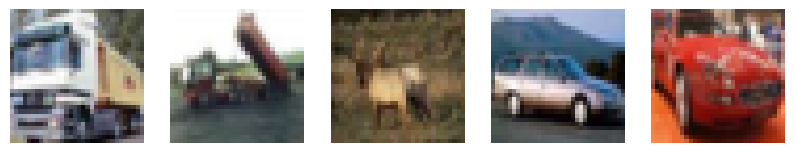

Shape of an image: (3, 32, 32)


In [74]:
x_train_val_np_color, y_train_val_np_color = load_cifar10(train=True, color=True)
x_test_np_color, y_test_np_color = load_cifar10(train=False, color=True)
plot_images(x_train_val_np_color, y_train_val_np_color, rows=1, cols=5, color=True)
print(f'Shape of an image: {x_train_val_np_color[0].shape}')

In [163]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10, dropout_prob=0.25):
        super(LeNet5, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.flatten = nn.Flatten()
        
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)
        
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        return out


## Exercise 11
Split the data, create dataloaders, train an instance of `LeNet5Color`, and compare it with `LeNet5` using the test set.

In [164]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, random_split


CIFAR_MEAN = [0.49139968, 0.48215827, 0.44653124]
CIFAR_STD = [0.24703233, 0.24348505, 0.26158768]
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    #transforms.ToTensor(),
    transforms.Normalize(CIFAR_MEAN, CIFAR_STD),
  ])

x_train_val_tensor_color = torch.tensor(x_train_val_np_color, dtype=torch.float32)
y_train_val_tensor_color = torch.tensor(y_train_val_np_color, dtype=torch.long)

x_test_tensor_color = torch.tensor(x_test_np_color, dtype=torch.float32)
y_test_tensor_color = torch.tensor(y_test_np_color, dtype=torch.long)

train_val_dataset_color = TensorDataset(x_train_val_tensor_color, y_train_val_tensor_color)
test_dataset_color = TensorDataset(x_test_tensor_color, y_test_tensor_color)

train_size_color = int(0.8 * len(train_val_dataset_color))
val_size_color = len(train_val_dataset_color) - train_size_color
train_dataset_color, val_dataset_color = random_split(train_val_dataset_color, [train_size_color, val_size_color])

train_loader_color = DataLoader(train_dataset_color, batch_size=512, shuffle=True)
val_loader_color = DataLoader(val_dataset_color, batch_size=512, shuffle=False)
test_loader_color = DataLoader(test_dataset_color, batch_size=512, shuffle=False)



In [165]:
output_dim = 10  

modelc = LeNet5(output_dim).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelc.parameters(), lr=0.001)
for epoch in range(num_epochs):

    train_loss, train_accuracy = train_one_epoch(modelc, train_loader_color, criterion, optimizer, device)
    
    val_loss, val_accuracy = evaluate(modelc, val_loader_color, criterion, device)
    

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 50)

Epoch 1/50
Train Loss: 1.8288, Train Accuracy: 0.3170
Validation Loss: 1.8112, Validation Accuracy: 0.3389
--------------------------------------------------
Epoch 2/50
Train Loss: 1.5309, Train Accuracy: 0.4325
Validation Loss: 1.6341, Validation Accuracy: 0.4231
--------------------------------------------------
Epoch 3/50
Train Loss: 1.4243, Train Accuracy: 0.4796
Validation Loss: 1.4733, Validation Accuracy: 0.4908
--------------------------------------------------
Epoch 4/50
Train Loss: 1.3574, Train Accuracy: 0.5077
Validation Loss: 1.5593, Validation Accuracy: 0.4741
--------------------------------------------------
Epoch 5/50
Train Loss: 1.3063, Train Accuracy: 0.5317
Validation Loss: 1.3599, Validation Accuracy: 0.5336
--------------------------------------------------
Epoch 6/50
Train Loss: 1.2696, Train Accuracy: 0.5455
Validation Loss: 1.3293, Validation Accuracy: 0.5376
--------------------------------------------------
Epoch 7/50
Train Loss: 1.2309, Train Accuracy: 0.559

In [166]:
test_loss, test_accuracy = evaluate(modelc, test_loader_color, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.9991, Test Accuracy: 0.6605


## Exercise 12
- Randomly take 10 examples from each class of CIFAR10 to make a subset (*) of the dataset.
- Load this model ResNet18 pre-trained on ImageNet v1 which is available from `torchvision.models`. See [this](https://pytorch.org/vision/stable/models.html) and [this documentation](https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18).
- Fine-tune the pre-trained model for 10-class classification with your subset (from (*)) of CIFAR10 (with colors). Train the model for 5 epochs.
- You may need to carefully read [this documentation](https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18) to do the right data pre-processing.

For this exercise, what is important is to have correct code. The final accuracy is less important, so you don't need to spend too much time on tuning hyper-parameters. There is a big difference in the image sizes, and it is challenging to make this transfer learning successful.

In [38]:
import numpy as np

# Extract the numpy arrays from the tensor datasets for easy manipulation
x_train_val_np_subset = x_train_val_tensor_color.numpy()
y_train_val_np_subset = y_train_val_tensor_color.numpy()

# Initialize a list to store the indices of the selected samples
selected_indices = []

# Loop over each class (0 to 9)
for label in range(10):
    # Get the indices of samples with the current class label
    label_indices = np.where(y_train_val_np_subset == label)[0]
    
    # Randomly select 10 samples from this class
    selected_indices.extend(np.random.choice(label_indices, 10, replace=False))

# Use these indices to create the subset
x_subset_np = x_train_val_np_subset[selected_indices]
y_subset_np = y_train_val_np_subset[selected_indices]

# Convert the subset back to tensors
x_subset_tensor = torch.tensor(x_subset_np, dtype=torch.float32)
y_subset_tensor = torch.tensor(y_subset_np, dtype=torch.long)

# Create a dataset from the subset tensors
subset_dataset = TensorDataset(x_subset_tensor, y_subset_tensor)

# Since the subset is small, we can use it directly without further splitting
subset_loader = DataLoader(subset_dataset, batch_size=10, shuffle=True)


In [40]:
import torchvision.models as models
import torch.optim as optim


# Load the pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)

# Freeze all layers
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the final layer to output 10 classes
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)



# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transfer the model to the device
resnet18 = resnet18.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):

    train_loss, train_accuracy = train_one_epoch(resnet18, subset_loader, criterion, optimizer, device)
    
    val_loss, val_accuracy = evaluate(model, val_loader_color, criterion, device)
    

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 50)



/Users/lorenzomathieu/Documents/Deep_report/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lorenzomathieu/Documents/Deep_report/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5
Train Loss: 2.5688, Train Accuracy: 0.1100
Validation Loss: 1.0334, Validation Accuracy: 0.6444
--------------------------------------------------
Epoch 2/5
Train Loss: 2.3930, Train Accuracy: 0.1400
Validation Loss: 1.0334, Validation Accuracy: 0.6444
--------------------------------------------------
Epoch 3/5
Train Loss: 2.2727, Train Accuracy: 0.1700
Validation Loss: 1.0334, Validation Accuracy: 0.6444
--------------------------------------------------
Epoch 4/5
Train Loss: 1.7893, Train Accuracy: 0.4000
Validation Loss: 1.0334, Validation Accuracy: 0.6444
--------------------------------------------------
Epoch 5/5
Train Loss: 1.7350, Train Accuracy: 0.3700
Validation Loss: 1.0334, Validation Accuracy: 0.6444
--------------------------------------------------
